<font size="6" color=red><b><center> CASE STUDY ON REGRESSION</center></b></font> 

In [22]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
#read the dataset car_age_price as csv file
data=pd.read_csv('C:\\Users\\User\\Downloads\\car_age_price(1).csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [24]:
#data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [25]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [26]:
data.shape

(112, 2)

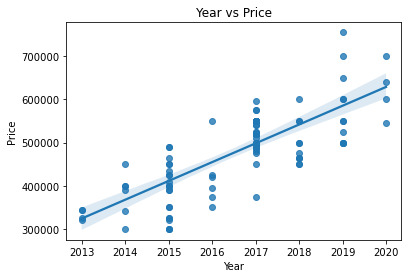

In [27]:
#the best fit line 
sns.regplot(x = "Year", y = "Price", data = data)
plt.title("Year vs Price")
plt.show()

In [28]:
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


In [29]:
#the dependent and independant varaible creation
X=data.drop(['Price'],axis=1)
y=data['Price']

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [31]:
#split the data for training and testing purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=0.3, 
                                                        random_state=77)

In [ ]:
#linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,y_train)
predictions=model.predict(X_test)

In [33]:
predictions

array([410494.99605078, 496276.42115657, 367604.28349788, 496276.42115657,
       410494.99605078, 324713.57094499, 496276.42115657, 496276.42115657,
       410494.99605078, 539167.13370946, 539167.13370946, 410494.99605078,
       496276.42115657, 410494.99605078, 496276.42115657, 496276.42115657,
       496276.42115657, 324713.57094499, 410494.99605078, 582057.84626235,
       496276.42115657, 496276.42115657, 410494.99605078, 496276.42115657,
       496276.42115657, 496276.42115657, 453385.70860367, 410494.99605078,
       324713.57094499, 496276.42115657, 324713.57094499, 367604.28349788,
       496276.42115657, 582057.84626235])

In [45]:
#the possible price of a 2022 model second-hand grand i10
pred2022=model.predict([[2022]])
print('prediction of possible price of 2022 model is:',float(pred2022))

prediction of possible price of 2022 model is: 710729.7671932429


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [35]:
#coefficients beta1 and beta2
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -86014290.79802535
betas = [42890.71255289]


In [36]:
#calculation of mean_squared _error and r2_score for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
print('Mean Square Error Is:',mean_squared_error(y_test,predictions))
print('R Square Error Is:',r2_score(y_test,predictions))

Mean Square Error Is: 1573029682.068065
R Square Error Is: 0.7847058256197359


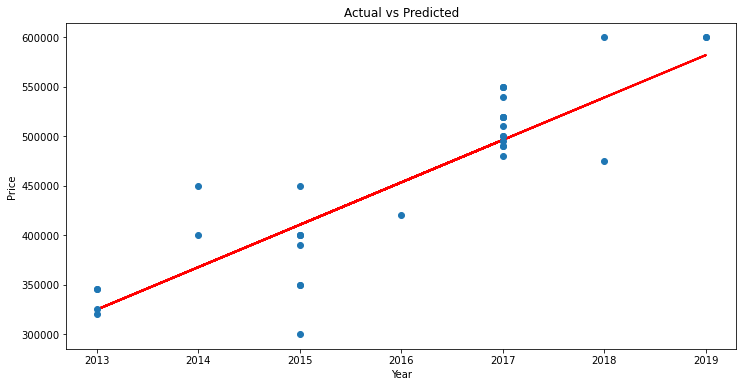

In [37]:
#plot the graph with best fit line after finding the best linear relationship against X_test and y_test,predicted y value 
xrr = X_test.to_numpy()
yrr = y_test.to_numpy()
#p=X_test.iloc[:,:].values
#q=y_test.iloc[:,:].values
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(xrr,predictions,'r',linewidth=2)     # regression line
plt.plot(xrr,yrr,'o')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

In [46]:
#Lasso Regression

In [47]:
from sklearn.linear_model import Lasso

In [48]:
model = Lasso(alpha=0.1)
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [49]:
pre2022=model.predict([[2022]])
print('prediction of possible price of 2022 model',pre2022)

prediction of possible price of 2022 model [710729.76719324]


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [50]:
print('Mean Square Error Is:',mean_squared_error(y_test,prediction))
print('R Square Error Is:',r2_score(y_test,prediction))

Mean Square Error Is: 1573029961.9325848
R Square Error Is: 0.7847057873158174


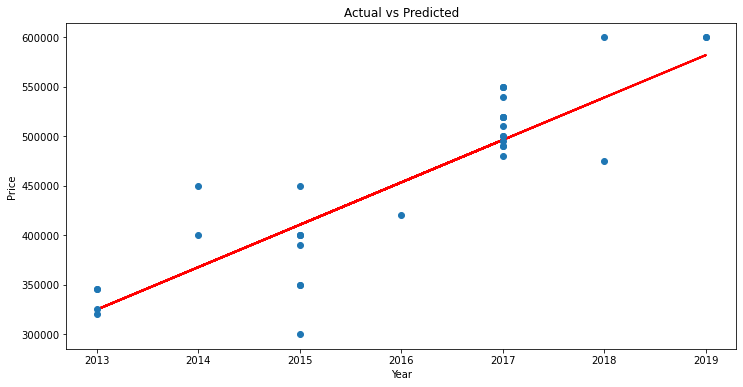

In [51]:
yrr = y_test.to_numpy()
#p=X_test.iloc[:,:].values
#q=y_test.iloc[:,:].values
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(xrr,prediction,'r',linewidth=2)     # regression line
plt.plot(xrr,yrr,'o')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

For this data linear and lasso regression provide same quality output(mean_squared_error and r2_score are similar for both the models)